In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colors_ns = {
    1: 'r',
    2: 'm',
    3: 'b',
    4: 'k',
    5: 'g'
}

In [3]:
def filter_df_by_n(df, filter_statement, ns, sorting_column):
    result = {}
    
    for n in ns:
        result[n] = df[filter_statement & (df['n'] == n)]
        result[n] = result[n].sort_values([sorting_column])
    
    return result

In [28]:
def filter_df(df, filter_statement, sorting_column):
    result = df[filter_statement]
    result = result.sort_values([sorting_column])
    
    return result

In [4]:
def plot_weights(dataframe, ns, num_dense, num_nodes):
    random_statement = (dataframe['num_dense'] == num_dense) & (dataframe['num_nodes'] == num_nodes) & (dataframe['is_random'])
    extremal_statement = (dataframe['num_dense'] == num_dense) & (dataframe['num_nodes'] == num_nodes) & (~dataframe['is_random'])
    
    data_random = filter_df_by_n(dataframe, random_statement, ns, 'weights')
    data_extremal = filter_df_by_n(dataframe, extremal_statement, ns, 'weights')
    
    for n in ns:
        plt.plot(data_random[n]['weights'], data_random[n]['test_metric'], '*--', label='random, n = {}'.format(n))
        plt.plot(data_extremal[n]['weights'], data_extremal[n]['test_metric'], '*--', label='extremal points, n = {}'.format(n))
    
    plt.xlabel('w$_{initial}$')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
    plt.savefig('weights.png')

In [5]:
def plot_layers(dataframe, reference_dataframe, ns, num_nodes, weights, ref_train=32, ref_nodes=None):
    if ref_nodes is None:
        ref_nodes = num_nodes
    
    pinn_statement = (dataframe['num_nodes'] == num_nodes) & (dataframe['weights'] == weights) & (dataframe['is_random'])
    reference_statement = (reference_dataframe['num_nodes'] == ref_nodes) & (reference_dataframe['num_train'] == ref_train)
    
    data_pinn = filter_df_by_n(dataframe, pinn_statement, ns, 'num_dense')
    data_ref = filter_df_by_n(reference_dataframe, reference_statement, ns, 'num_dense')

    for n in ns:
        plt.plot(data_pinn[n]['num_dense'], data_pinn[n]['test_metric'], '{}*--'.format(colors_ns[n]), label='n = {}'.format(n))
        plt.plot(data_ref[n]['num_dense'], data_ref[n]['test_metric'], '{}-'.format(colors_ns[n]), label='n = {}, reference'.format(n))
    
    plt.xlabel('number of layers')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('layers.png')

In [6]:
def plot_nodes(dataframe, reference_dataframe, ns, num_dense, weights, ref_train=32):
    pinn_statement = (dataframe['num_dense'] == num_dense) & (dataframe['weights'] == weights) & (dataframe['is_random'])
    ref_statement = (reference_dataframe['num_dense'] == num_dense) & (reference_dataframe['num_train'] == ref_train)
    
    data_pinn = filter_df_by_n(dataframe, pinn_statement, ns, 'num_nodes')
    data_ref = filter_df_by_n(reference_dataframe, ref_statement, ns, 'num_nodes')
    
    for n in ns:
        plt.plot(data_pinn[n]['num_nodes'], data_pinn[n]['test_metric'], '{}*--'.format(colors_ns[n]), label='n = {}'.format(n))
        plt.plot(data_ref[n]['num_nodes'], data_ref[n]['test_metric'], '{}-'.format(colors_ns[n]), label='n = {}, reference'.format(n))
    
    plt.xlabel('number of nodes per layer')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('nodes.png')

In [18]:
df_function = pd.read_csv('linear-function.csv')
df_pde = pd.read_csv('linear-pde.csv')
df_generalised = pd.read_csv('linear-generalised-n.csv')
df_ref_gen = pd.read_csv('linear-function-generalised-n.csv')
df_quantum_1d = pd.read_csv('linear-quantum-1d.csv')

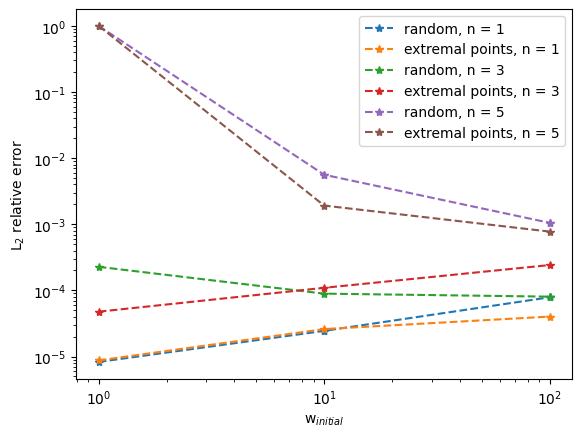

In [48]:
plot_weights(df_pde, [1, 3, 5], 5, 20)

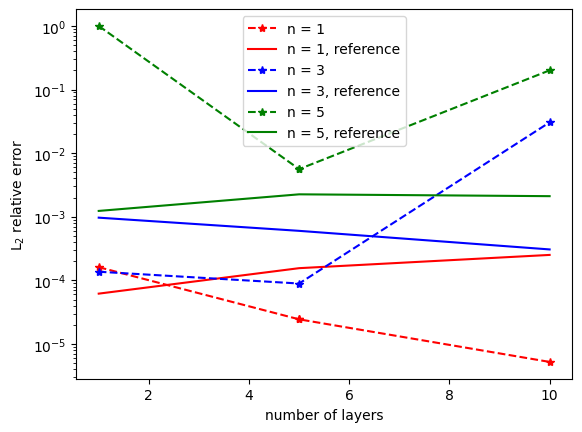

In [42]:
plot_layers(df_pde, df_function, [1, 3, 5], 20, 10)

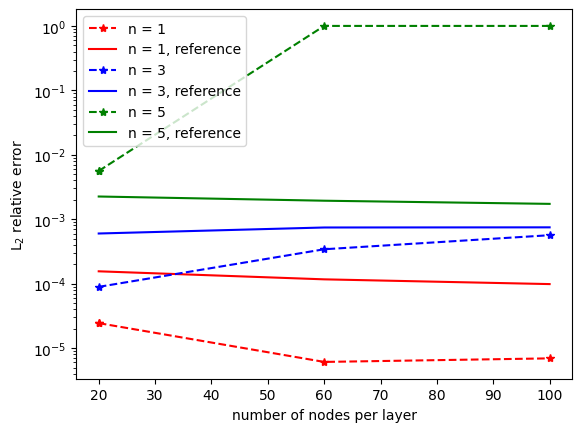

In [46]:
plot_nodes(df_pde, df_function, [1, 3, 5], 5, 10)

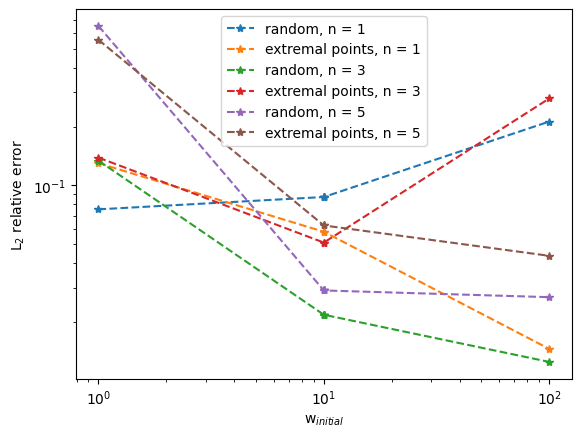

In [47]:
plot_weights(df_generalised, [1, 3, 5], 5, 75)

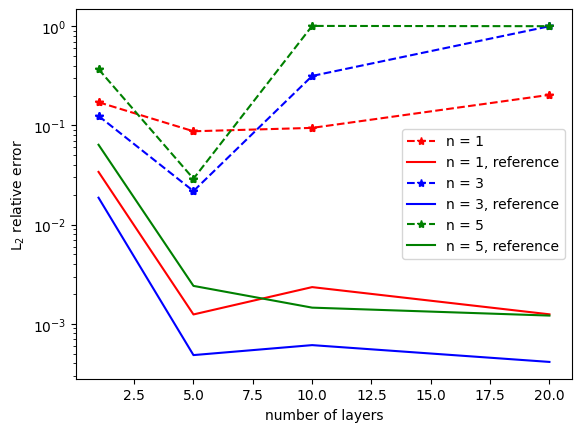

In [76]:
plot_layers(df_generalised, df_ref_gen, [1, 3, 5], 75, 10, ref_train=1024)

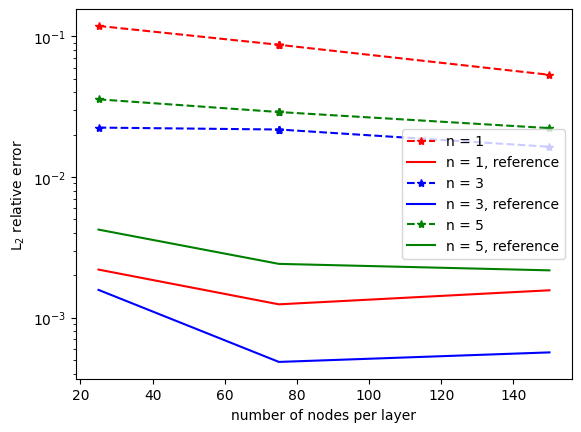

In [77]:
plot_nodes(df_generalised, df_ref_gen, [1, 3, 5], 5, 10, ref_train=1024)

In [8]:
df_quantum_1d

,n,num_dense,num_nodes,num_train,num_test,is_random,weights,test_metric
0,1,5,75,160,500,True,1,0.011699
1,2,5,75,160,500,True,1,0.077421
2,3,5,75,160,500,True,1,0.866810
3,4,5,75,160,500,True,1,0.966201
4,5,5,75,160,500,True,1,0.996185
5,6,5,75,160,500,True,1,1.023260
6,7,5,75,160,500,True,1,1.008610
7,1,5,75,160,500,False,1,0.011778
8,2,5,75,160,500,False,1,0.046332
9,3,5,75,160,500,False,1,0.919411


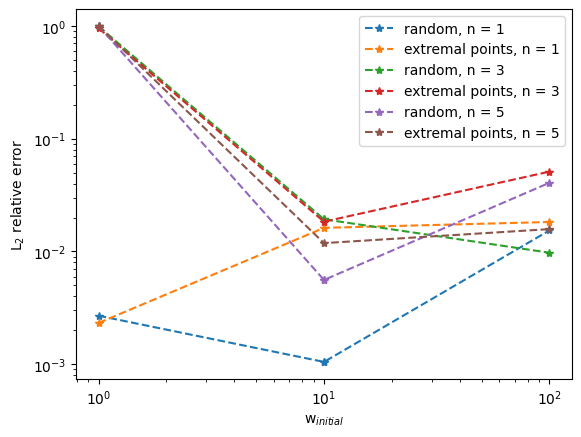

In [19]:
plot_weights(df_quantum_1d, [1, 3, 5], 5, 20)

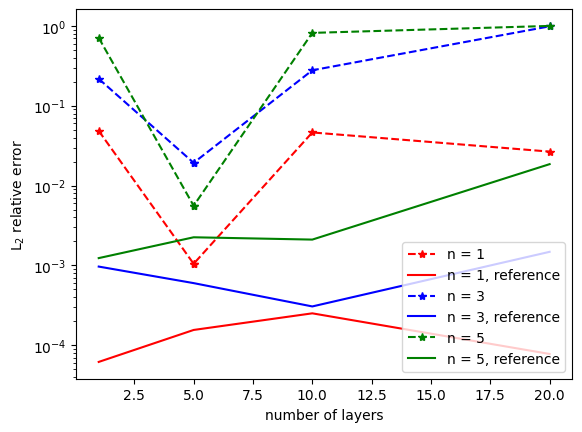

In [20]:
plot_layers(df_quantum_1d, df_function, [1, 3, 5], 20, 10)

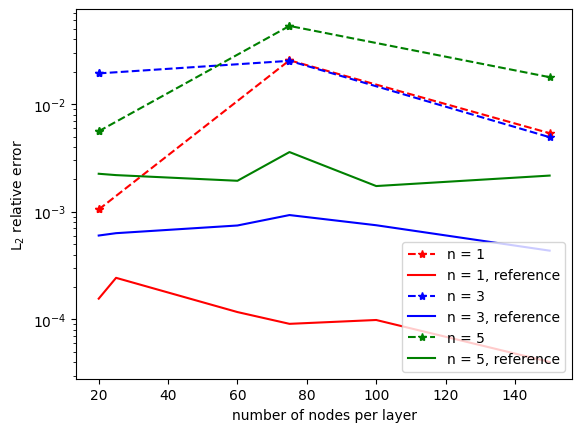

In [21]:
plot_nodes(df_quantum_1d, df_function, [1, 3, 5], 5, 10)

In [29]:
def extract_n_serie(df, num_dense, num_nodes, weights):
    filter_statement = (df['num_dense'] == num_dense) & (df['num_nodes'] == num_nodes) & (df['is_random']) & (df['weights'] == weights)
    df_filtered = filter_df(df, filter_statement, 'n')
    return df_filtered

In [31]:
pde_ns = extract_n_serie(df_pde, 5, 20, 10)

In [47]:
gen_n_ns = extract_n_serie(df_generalised, 5, 150, 10)
gen_n_ns.drop(gen_n_ns[gen_n_ns['n'] == 6].index, inplace=True)
gen_n_ns.drop(gen_n_ns[gen_n_ns['n'] == 7].index, inplace=True)
gen_n_ns

,n,num_dense,num_nodes,num_train,num_test,is_random,weights,test_metric
259,1,5,150,1024,10000,True,10,0.053353
260,2,5,150,1024,10000,True,10,0.023718
261,3,5,150,1024,10000,True,10,0.016416
262,4,5,150,1024,10000,True,10,0.008602
263,5,5,150,1024,10000,True,10,0.022276


In [48]:
gen_quantum_ns = extract_n_serie(df_quantum_1d, 5, 20, 10)
gen_quantum_ns.drop(gen_quantum_ns[gen_quantum_ns['n'] == 6].index, inplace=True)
gen_quantum_ns.drop(gen_quantum_ns[gen_quantum_ns['n'] == 7].index, inplace=True)
gen_quantum_ns

,n,num_dense,num_nodes,num_train,num_test,is_random,weights,test_metric
70,1,5,20,160,500,True,10,0.001049
161,1,5,20,160,500,True,10,0.001049
71,2,5,20,160,500,True,10,0.006889
162,2,5,20,160,500,True,10,0.006889
72,3,5,20,160,500,True,10,0.019302
163,3,5,20,160,500,True,10,0.019302
73,4,5,20,160,500,True,10,0.012946
164,4,5,20,160,500,True,10,0.012946
74,5,5,20,160,500,True,10,0.005593
165,5,5,20,160,500,True,10,0.005593


In [49]:
def plot_n_graph(df_pde, df_gen_n, df_quantum):
    plt.plot(df_pde['n'], df_pde['test_metric'], '*--', label='PINN for fixed n')
    plt.plot(df_gen_n['n'], df_gen_n['test_metric'], '*--', label='PINN for continuous n')
    plt.plot(df_quantum['n'], df_quantum['test_metric'], '*--', label='PINN for discrete n')
    
    plt.xlabel('n')
    plt.ylabel('L$_2$ relative error')
    plt.yscale('log')
    plt.legend()
    plt.savefig('ns.png')

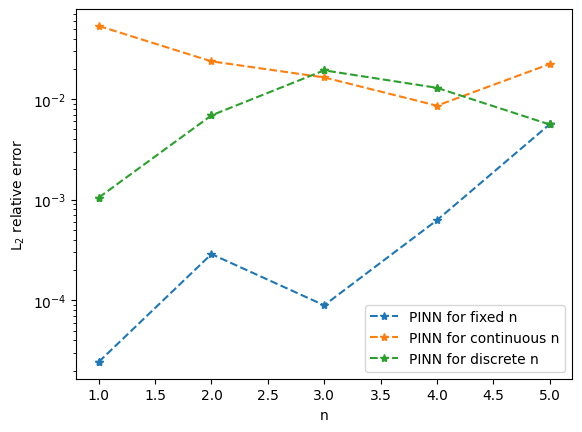

In [50]:
plot_n_graph(pde_ns, gen_n_ns, gen_quantum_ns)